In [2]:
import csv
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve,confusion_matrix,accuracy_score
                            


In [3]:
#Import both datasets 
a = pd.read_csv("Kaggle_Training_Dataset_v2.csv")
b = pd.read_csv("Kaggle_Test_Dataset_v2.csv")


C:\Users\AymaneAmine\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
a

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687856,1373987,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,...,0.0,-99.00,-99.00,1.0,No,No,No,Yes,No,No
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,...,0.0,0.86,0.84,1.0,Yes,No,No,No,No,Yes
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,...,0.0,0.86,0.84,6.0,No,No,No,Yes,No,No
1687859,1502009,19.0,4.0,0.0,0.0,0.0,0.0,2.0,7.0,12.0,...,0.0,0.73,0.78,1.0,No,No,No,Yes,No,No


In [6]:
a.columns


Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [7]:
#Combine into one dataset
merged = pd.concat([a,b])


#first 5 entries
merged.head(5).transpose()

,0,1,2,3,4
sku,1026827,1043384,1043696,1043852,1044048
national_inv,0.0,2.0,2.0,7.0,8.0
lead_time,NaN,9.0,NaN,8.0,NaN
in_transit_qty,0.0,0.0,0.0,0.0,0.0
forecast_3_month,0.0,0.0,0.0,0.0,0.0
forecast_6_month,0.0,0.0,0.0,0.0,0.0
forecast_9_month,0.0,0.0,0.0,0.0,0.0
sales_1_month,0.0,0.0,0.0,0.0,0.0
sales_3_month,0.0,0.0,0.0,0.0,0.0
sales_6_month,0.0,0.0,0.0,0.0,0.0


In [8]:
#---------- Basic Data Manipulation-----------#

#recode binary variables as 0 / 1 rather than No / Yes
for col in ['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']:    
    merged[col]=pd.factorize(merged[col])[0]


In [9]:

#remove the two rows of all NA's
merged=merged[pd.notnull(merged['national_inv'])]

#Change the -99 placeholder to NA for perf_6_month_avg and perf_12_month_avg
merged['perf_6_month_avg']=merged['perf_6_month_avg'].replace(-99, np.NaN)
merged['perf_12_month_avg']=merged['perf_12_month_avg'].replace(-99, np.NaN)

In [10]:

#define quantitative and categorical variable lists 
quantvars=['national_inv',
           'lead_time',
           'in_transit_qty',
           'forecast_3_month',
           'forecast_6_month',
           'forecast_9_month',
           'sales_1_month',
           'sales_3_month',
           'sales_6_month',
           'sales_9_month',
           'min_bank',
           'pieces_past_due',
           'perf_6_month_avg',
           'perf_12_month_avg',
           'local_bo_qty']

catvars=['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop',
            'went_on_backorder']

catpred=['potential_issue',
            'deck_risk',
            'oe_constraint',
            'ppap_risk',
            'stop_auto_buy',
            'rev_stop']

national_inv


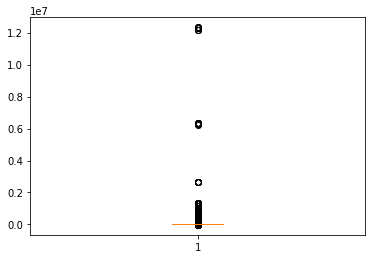

lead_time


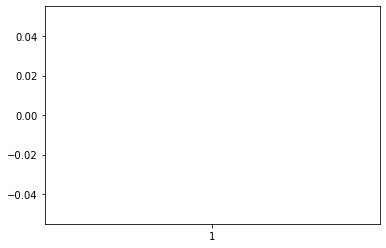

in_transit_qty


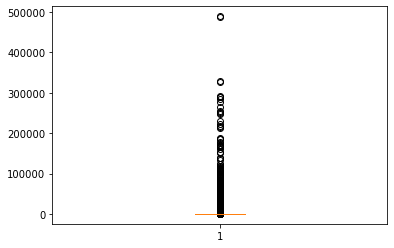

forecast_3_month


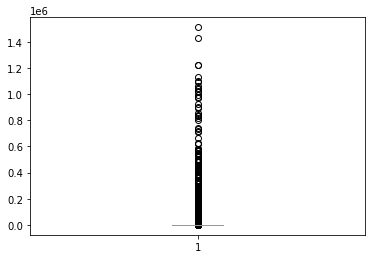

forecast_6_month


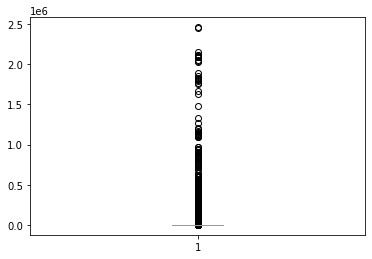

forecast_9_month


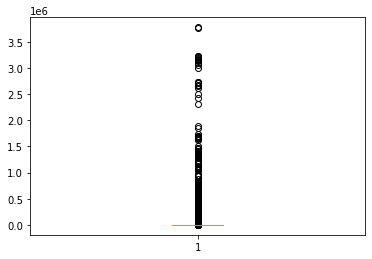

sales_1_month


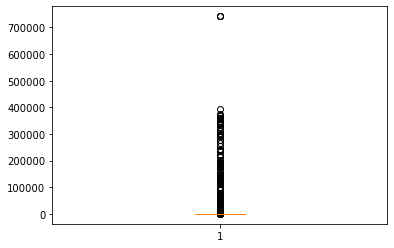

sales_3_month


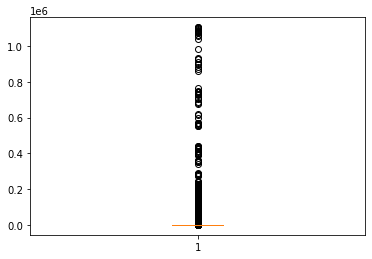

sales_6_month


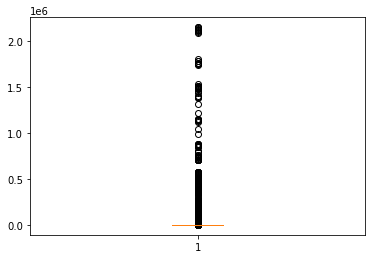

sales_9_month


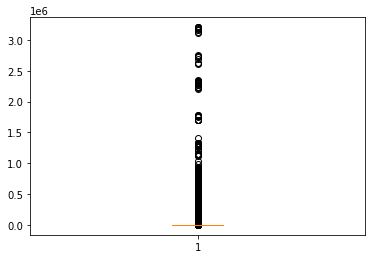

min_bank


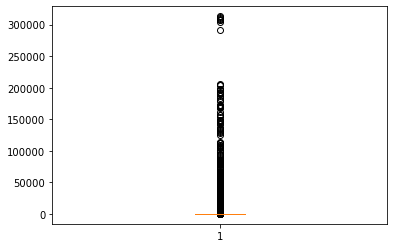

pieces_past_due


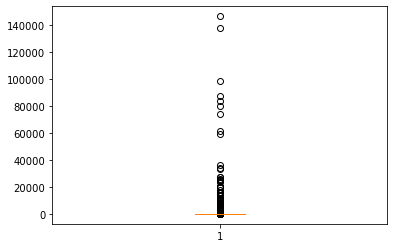

perf_6_month_avg


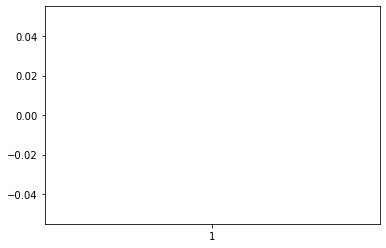

perf_12_month_avg


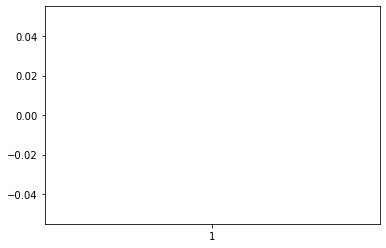

local_bo_qty


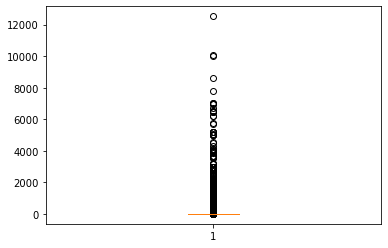

In [11]:
#----------Descriptive Statistics and Plots-----------#

#---Quantitative variables-----#

#summary of quantitative variables
merged[quantvars].describe().transpose() 

#means by backorder status
merged.pivot_table(values=quantvars,index=['went_on_backorder'])

#boxplots of quantitative variables
for col in quantvars:
    print(col)
    plt.boxplot(merged[col])
    plt.show()

potential_issue :  0.05 %
deck_risk :  22.56 %
oe_constraint :  0.02 %
ppap_risk :  12.05 %
stop_auto_buy :  3.66 %
rev_stop :  0.04 %
went_on_backorder :  0.72 %


TypeError: only size-1 arrays can be converted to Python scalars

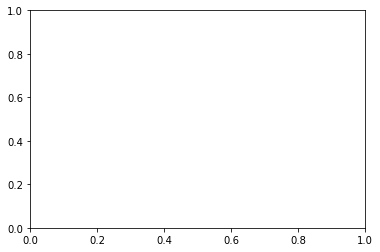

In [12]:
#---Categorical variables-----#

#Percentage of each categorical variable
for col in catvars:
    print(col,": ",round(merged[col].mean()*100,2),"%" )

#Proportions stratified by went_on_backorder
merged.pivot_table(values=(catpred),index=["went_on_backorder"])

#barplots of proportions stratified by went_on_backorder
for col in catpred:
    noback=np.array(merged.pivot_table(values=(col),index=["went_on_backorder"]))[0]
    yesback=np.array(merged.pivot_table(values=(col),index=["went_on_backorder"]))[1]
    names = ('Not Backordered', 'Backordered')
    y_pos = np.arange(2)
    proportions = [noback,yesback]
    plt.bar(y_pos, proportions, align='center', alpha=0.5)
    plt.xticks(y_pos, names)
    plt.ylabel('proportion')
    plt.title("Proportion of %s by backorder status" % (col))
    plt.show()

ValueError: The number of FixedLocator locations (23), usually from a call to set_ticks, does not match the number of ticklabels (22).

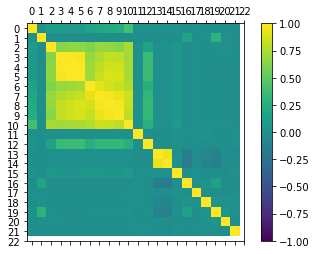

In [13]:
# Correction Matrix Plot of all variables
varnames=list(merged)[1:]    
correlations = merged[varnames].corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,23,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(varnames,rotation=90)
ax.set_yticklabels(varnames)
plt.show()


In [14]:
#----------------Missing Data---------------------#

#View count/percentage of missing cells
tot = merged.isnull().sum().sort_values(ascending=False)
perc = ( round(100*merged.isnull().sum()/merged.isnull().count(),1) ).sort_values(ascending=False)
missing_data = pd.concat([tot, perc], axis=1, keys=['Missing', 'Percent'])
missing_data

#create a variable for any missing data
merged['anymissing']=(  pd.isnull(merged['perf_6_month_avg'] ) | 
                        pd.isnull(merged['perf_12_month_avg'] ) | 
                        pd.isnull(merged['lead_time'] ) ).astype(int) 

'''
Compare complete data to data with any missing variables
> Means of quantitative variables
> Proportions of categorical variables
'''
merged.pivot_table(values=(quantvars),index=['anymissing'])
merged.pivot_table(values=(catvars),index=['anymissing'])

#impute the medians
merged=merged.fillna(merged.median(), inplace=True)


In [ ]:








#--------------------Modeling-----------------------#

# 10-fold Cross Validation

#create a blank dataframe to fill
merged_pred=pd.DataFrame(data=None,index=merged.index)

#Define folds
kf = KFold(n_splits=10,shuffle=True,random_state=123)  

#Define index of dataset (to help in data sepparations within folds)
ind=merged.index


#fit models in each 
for train_index, test_index in kf.split(merged):
    
    #Define Training data
    merged_train=merged[ind.isin(train_index)]
    y_train=merged_train['went_on_backorder']
    X_train=merged_train.drop(['sku','went_on_backorder'],axis=1)

    #Define Test data
    merged_test=merged[ind.isin(test_index)]
    y_test=merged_test['went_on_backorder']
    X_test=merged_test.drop(['sku','went_on_backorder'],axis=1)
    
    #Define down-sampled training data
    train_majority = merged_train[y_train==0]
    train_minority = merged_train[y_train==1]
    n_minority = len(train_minority)
    train_majority_downsampled = resample(train_majority, 
                                 replace=False,    
                                 n_samples=n_minority,     
                                 random_state=123) 
    train_downsampled = pd.concat([train_majority_downsampled, train_minority])
    y_train_downsampled = train_downsampled['went_on_backorder']
    X_train_downsampled = train_downsampled.drop(['sku','went_on_backorder'],axis=1)
    
    
    #---------------------------------------------------------------#
    #Function to fit models
    def fitrandomforests(n_est,maxfeat,minleaf):
        
        #names for variables based on inputs
        varname= "pred_nest%s_feat%s_leaf%s" % (n_est,maxfeat,minleaf)
        varname2= "pred_down_nest%s_feat%s_leaf%s" % (n_est,maxfeat,minleaf)
        
        #Fit a Random Forest model
        rf=RandomForestClassifier(n_estimators=n_est,
                                  max_features=maxfeat,
                                  min_samples_leaf=minleaf)
        rf.fit(X_train,y_train)
        preds=rf.predict_proba(X_test)[:,1]
        merged_test[varname]=preds
        
        #Fit a Random Forest model on downsampled data
        rfd=RandomForestClassifier(n_estimators=n_est,
                                   max_features=maxfeat,
                                   min_samples_leaf=minleaf)
        rfd.fit(X_train_downsampled,y_train_downsampled)
        predsd=rfd.predict_proba(X_test)[:,1]
        merged_test[varname2]=predsd
    
        
        
    #---------------------------------------------------------------#
    
    #Tuning parameter grids
    
    #number of trees (more is better for prediction but slower)
    n_est=50
    #maximum features tried
    maxfeatgrid=[3,5,7]
    #Minimum samples per leaf
    minleafgrid=[5,10,30]
    

    #fit models
    for feat in maxfeatgrid:
        for leaf in minleafgrid:
            fitrandomforests(n_est,feat,leaf)

    #Combine predictions for this fold with previous folds
    merged_pred = pd.concat([merged_pred,merged_test])



#drop NA's from dataframe caused by the method for combining datasets from each loop iteration
merged_pred=merged_pred.dropna()  



#-------------------ROC Curves ---------------------------#

#View AUC

for feat in maxfeatgrid:
    for leaf in minleafgrid:
        #Random forest for given tuning parameters
        varname1="pred_nest50_feat%s_leaf%s" % (feat,leaf)
        rocscore1=roc_auc_score(merged_pred['went_on_backorder'],merged_pred[varname1])
        print( round(rocscore1,4 ) , varname1 )
        #Down Sampled Random Forest for given tuning parameters
        varname2="pred_down_nest50_feat%s_leaf%s" % (feat,leaf)
        rocscore2=roc_auc_score(merged_pred['went_on_backorder'],merged_pred[varname2])
        print( round(rocscore2,4) , varname2 )

#ROC Curves

#Define false positive rates/true positive rates / thresholds
        
#Best random forest model
fpr, tpr, thresholds =roc_curve(merged_pred['went_on_backorder'],merged_pred['pred_nest50_feat3_leaf5'])
#Best down sampled random forest model
fpr2, tpr2, thresholds2 =roc_curve(merged_pred['went_on_backorder'],merged_pred['pred_down_nest50_feat7_leaf5'])

#AUC for best Random Forest and Random Forest Downsampled Models
roc_auc=roc_auc_score(merged_pred['went_on_backorder'],merged_pred['pred_nest50_feat3_leaf5'])
roc_auc2=roc_auc_score(merged_pred['went_on_backorder'],merged_pred['pred_down_nest50_feat7_leaf5'])


#plot ROC Curve
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label='RF (AUC = %0.3f)'% roc_auc)
plt.plot(fpr2, tpr2, 'g', label='RF Downsampled (AUC = %0.3f)'% roc_auc2)
plt.plot([0,1],[0,1],'r--', label='Random Guess')
plt.legend(loc='lower right')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')


#Precision and Recall

#Precision: The proportion of predicted backorders that actually go on backorder
#Recall: The proportion of backordered items that are predicted to go on backorder

#define precision, recall, and corresponding threshold for model with hightest AUC
precision, recall, threshold = precision_recall_curve(merged_pred['went_on_backorder'],merged_pred['pred_nest50_feat3_leaf5'])

#plot Precision and Recall for a given threshold.
plt.title('Precision and Recall')
plt.plot(threshold,precision[1:],'purple',label='Precision')
plt.plot(threshold,recall[1:],'orange', label='Recall')
plt.legend(loc=2,bbox_to_anchor=(1.05, 1))
plt.xlim([0,.6])
plt.ylim([0,1])
plt.axvline(x=.05,linestyle=":",color="blue")
plt.ylabel('Precision and Recall Values')
plt.xlabel('Threshold')



#Consider the model in more depth
    #---------------------------------------------------------------#
#Optimal Threshold
#For example: threshold of 0.05 gives precision of 17% and recall of 78%
precision[1:][abs(threshold-0.05)<.00000025]
recall[1:][abs(threshold-0.05)<.00000025]



#Confusion Matrix 
merged_pred['optimal_classification']=merged_pred['pred_nest50_feat3_leaf5']>.05
pd.crosstab(merged_pred['went_on_backorder'],merged_pred['optimal_classification'], rownames=['Went on Backorder'], colnames=['Predicted going on Backorder?'])

#Note that accuracy is only 97% when the accuracy of the BAD "never-backordered" model has 99.3% accuracy
accuracy_score(merged_pred['went_on_backorder'],merged_pred['optimal_classification'])
merged_pred['naive_estimator']=0
accuracy_score(merged_pred['went_on_backorder'],merged_pred['naive_estimator'])


#---------------------------------------------------------------#

#Fit model on entire dataset, 
rf=RandomForestClassifier(n_estimators=100,
                          max_features=3,
                          min_samples_leaf=5)
y=merged['went_on_backorder']
X=merged.drop(['sku','went_on_backorder'],axis=1)
rf.fit(X,y)

#importance of variables
list(zip(list(X),rf.feature_importances_))
importance = rf.feature_importances_
importance = pd.DataFrame(importance, index=X.columns,columns=["Importance"])
importance["Std"] = np.std([rf.feature_importances_ for tree in rf.estimators_], axis=0)
importance=importance.sort_values(['Importance'],ascending=False)

#plot importances
xlim = range(importance.shape[0])
plt.bar(xlim, importance['Importance'], yerr=importance['Std'], align="center")
plt.xticks(range(0,22), importance.index,rotation=90)
plt.show()